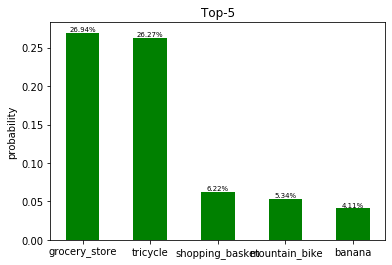

In [2]:

import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

def percent(value):
    return '%.2f%%' % (value * 100)

model = VGG16(weights='H:/vgg16_weights_tf_dim_ordering_tf_kernels.h5', include_top=True)
img_path = 'H:/sg_dataset/sg_test_images/4085049_2fda7bc44b_o.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) 
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

pred=decode_predictions(features, top=5)[0]


#整理预测结果,value
values = []
bar_label = []
for element in pred:
    values.append(element[2])
    bar_label.append(element[1])

#绘图并保存
fig=plt.figure(u"Top-5 预测结果")
ax = fig.add_subplot(111) 
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability') 
ax.set_title(u'Top-5') 
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=7)

fig = plt.gcf()
plt.show()

name=img_path[0:-4]+'_pred'
fig.savefig(name, dpi=200)